# Plot attentions

### Load model

In [2]:
import sys, os
ROOT = "/home/hadoop/deepy"
sys.path.append(ROOT)

In [37]:
from deepy.dataset import MnistDataset, MiniBatches
mnist = MiniBatches(MnistDataset(), batch_size=1)

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import theano

def draw(network, offset=0):
    global mnist
    
    glimpse_function = theano.function([network.inputs[0]], network.layers[0].positions)
    
    plt.figure(figsize=(16, 16))

    for image_n in range(25):
        image = mnist.test_set()[image_n + offset][0].reshape((28,28))
        prediction = np.argmax(network.predict(image.reshape((1,28*28))))
        glimpses = glimpse_function(image.reshape((1,28*28)))

        gca = plt.subplot(5, 5, image_n+1)
        gca.matshow(image, cmap="gray")
        for i, glimpse in enumerate(glimpses):
            x, y = glimpse * 14 + 14
            gca.add_patch(Rectangle((x - 3.5, y - 3.5), 7, 7, ec="red", fill=None, alpha=0.8))
            gca.annotate(str(i+1), xy=(x - 3.5, y - 3.5), color='r', weight='bold', fontsize=8, ha='center', va='center', alpha=0.8)
        gca.annotate("Prediction: %d" % prediction, xy=(19, 26), color='r', weight='bold', fontsize=12, ha='center', va='center', alpha=0.8)
    plt.show()

### Baseline model

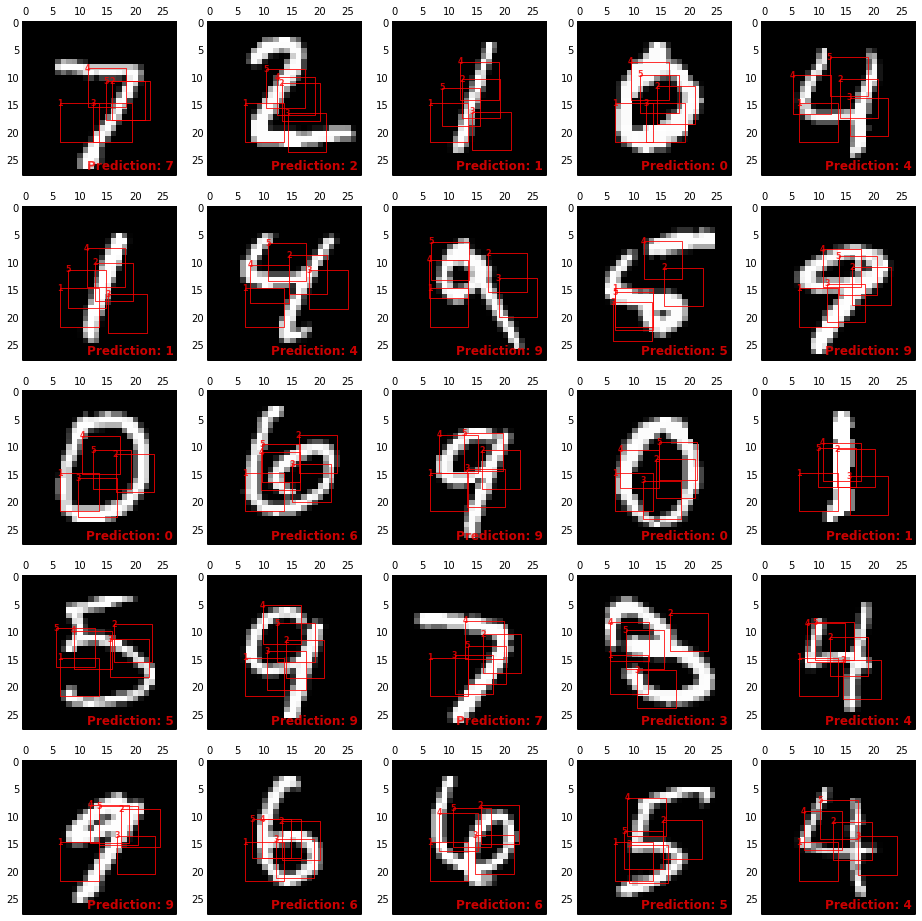

In [73]:
import experiments.attention_models.baseline_model
reload(experiments.attention_models.baseline_model)
from experiments.attention_models.baseline_model import get_network

model_path = os.path.join(ROOT, "experiments/attention_models/models/mnist_att_params2.gz")
network = get_network(model_path, disable_reinforce=True)
draw(network)

### First glimpse model

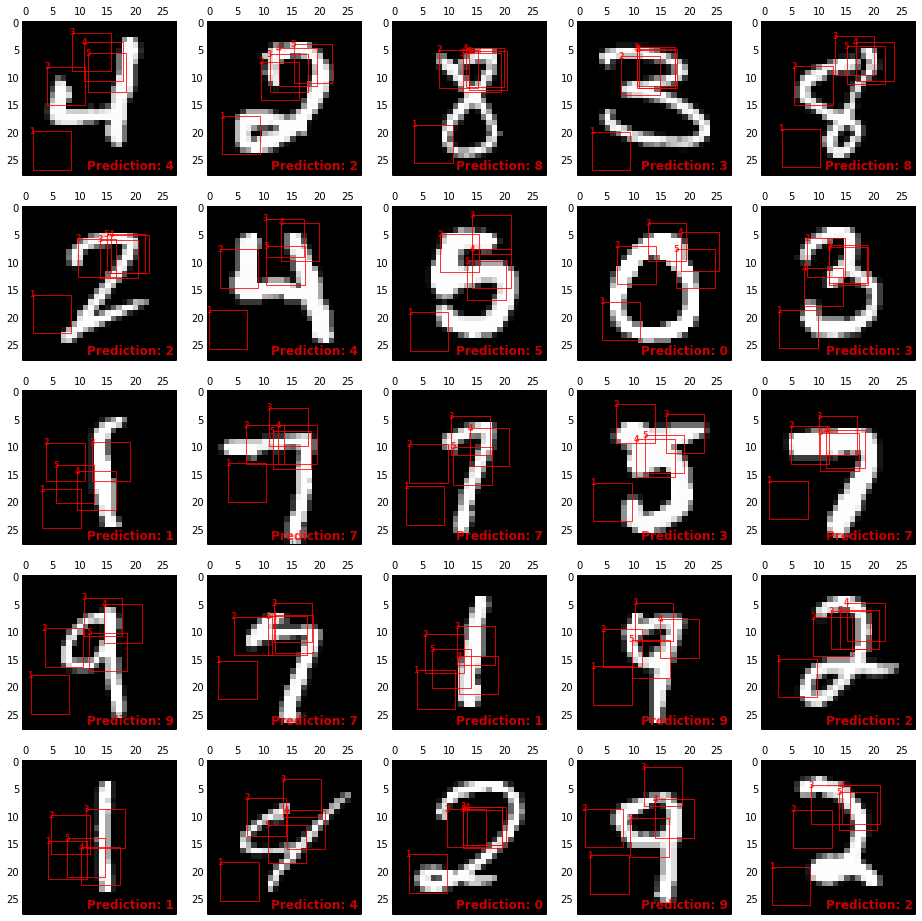

In [74]:
import experiments.attention_models.first_glimpse_model
reload(experiments.attention_models.first_glimpse_model)
from experiments.attention_models.first_glimpse_model import get_network

model_path = os.path.join(ROOT, "experiments/attention_models/models/first_glimpse_model1.gz")
network = get_network(model_path, disable_reinforce=True)
draw(network, offset=399)